In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import glob
import os

## This section plots the cross validation errors of each structure
Firstly the errors are read in from the sub directories into a dictionary, converting the error to a float. These are read into a dictionary for each potential used, and the fit error for each structure, for that potential, are plotted against the error.

In [2]:
head_directory_name = 'cross_validation'

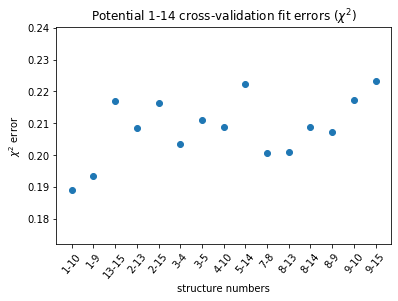

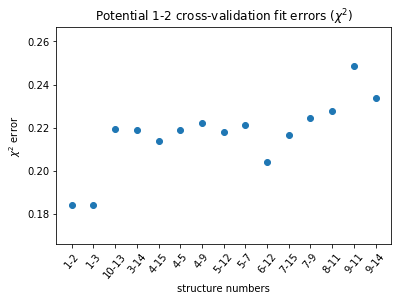

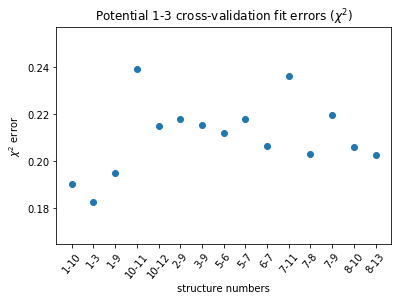

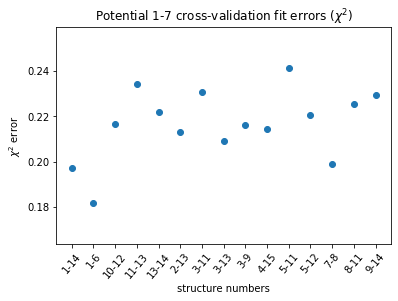

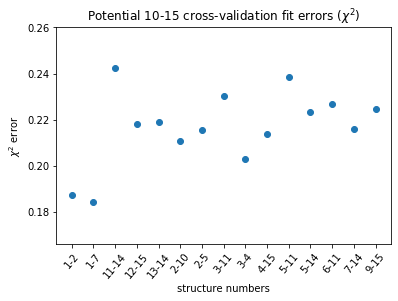

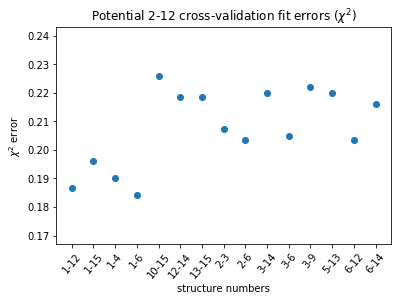

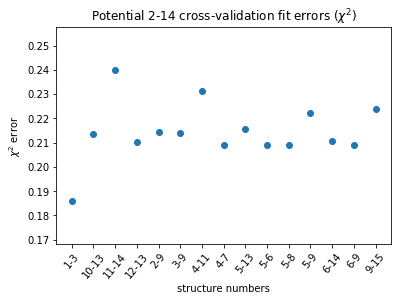

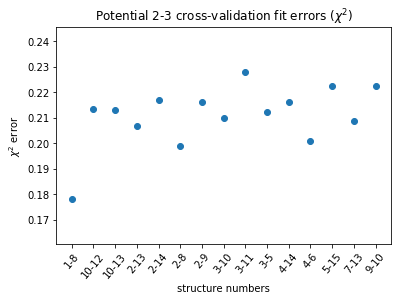

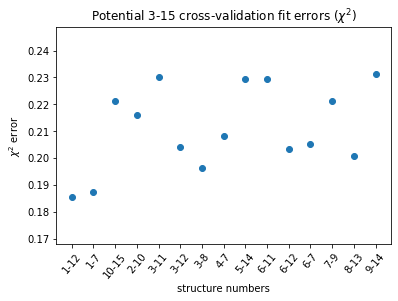

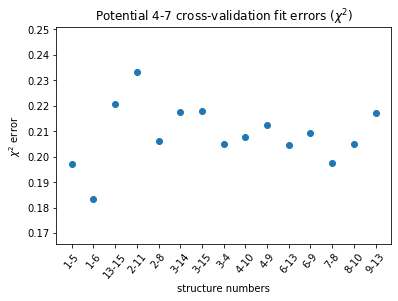

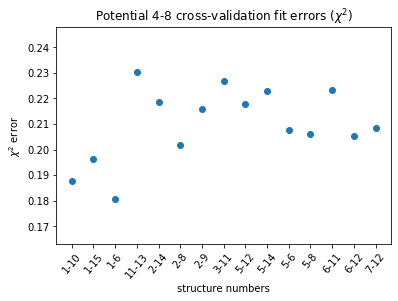

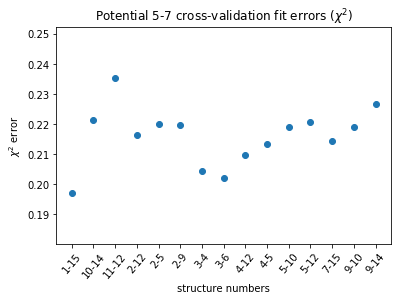

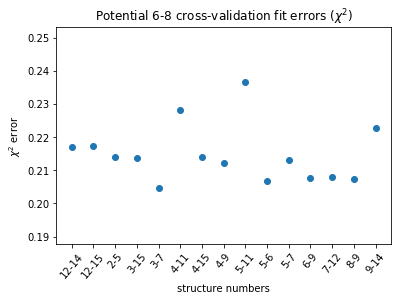

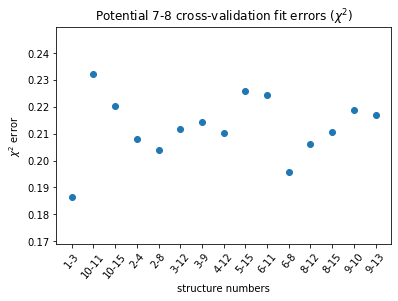

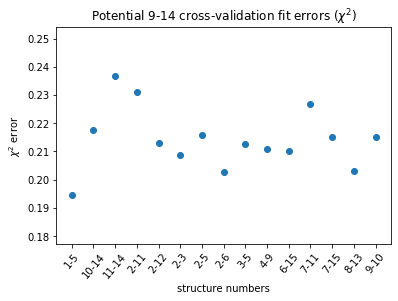

In [8]:
for cv_directory in sorted(glob.glob('{}/*'.format(head_directory_name))):
    error_dict = {}
    for error_file in sorted(glob.glob('{}/*error.dat'.format(cv_directory))):
        fit_struct_nums = error_file.replace(cv_directory, '').replace('/s','').replace('_error.dat', '')
        error = float(np.loadtxt(error_file))
        error_dict.update( {fit_struct_nums:error})
    plt.scatter(*zip(*sorted(error_dict.items())))
    plt.xticks(rotation=50)
    plt.xlabel('structure numbers')
    plt.ylabel('$\chi^2$ error')
    plt.title('Potential {} cross-validation fit errors ($\chi^2$)'.format(cv_directory.replace('cross_validation/p','')))
    plt.savefig('{}/p{}_cv_fit_errors.png'.format(head_directory_name,cv_directory.replace('cross_validation/p','')),dpi=500, bbox_inches = "tight")
    plt.show()